In [98]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from ast import literal_eval
from math import exp
from sklearn.linear_model import LinearRegression

In [2]:
lrp_output = pd.read_csv('LRP_Output_Large.csv', sep='|')
#lrp_output['sentence'] = lrp_output['sentence'].apply(literal_eval)
lrp_output['class_scores'] = lrp_output['class_scores'].apply(literal_eval)
lrp_output['word_relevances'] = lrp_output['word_relevances'].apply(literal_eval)
lrp_output['correct'] = lrp_output['true_class'] == lrp_output['predicted_class']
lrp_output['correct_coarse'] = np.sign(lrp_output['true_class'] - 2) == np.sign(lrp_output['predicted_class'] - 2)

In [3]:
lrp_output.describe()

,hidden_dimensions,embedding_dimensions,fine_accuracy,coarse_accuracy,true_class,predicted_class
count,54484.000000,54484.000000,54484.000000,54484.000000,54484.000000,54484.000000
mean,9.945525,9.945525,0.427671,0.768341,1.943396,2.068259
std,5.926726,5.926726,0.043645,0.072707,1.053577,1.150203
min,2.000000,2.000000,0.244000,0.422330,0.000000,0.000000
25%,6.000000,6.000000,0.426500,0.776699,1.000000,1.000000
50%,10.000000,10.000000,0.442500,0.790655,2.000000,2.000000
75%,14.000000,14.000000,0.451500,0.800364,3.000000,3.000000
max,60.000000,60.000000,0.473000,0.838592,4.000000,4.000000


In [4]:
lrp_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54484 entries, 0 to 54483
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hidden_dimensions     54484 non-null  int64  
 1   embedding_dimensions  54484 non-null  int64  
 2   fine_accuracy         54484 non-null  float64
 3   coarse_accuracy       54484 non-null  float64
 4   true_class            54484 non-null  int64  
 5   predicted_class       54484 non-null  int64  
 6   sentence              54484 non-null  object 
 7   class_scores          54484 non-null  object 
 8   word_relevances       54484 non-null  object 
 9   heatmap_html          54484 non-null  object 
 10  correct               54484 non-null  bool   
 11  correct_coarse        54484 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 4.3+ MB


In [5]:
dimension_groups = lrp_output.groupby(['hidden_dimensions', 'embedding_dimensions'])

In [6]:
correct_by_dim = dimension_groups['correct'].agg(['sum', 'count'])
correct_by_dim['accuracy'] = correct_by_dim['sum'] / correct_by_dim['count']
correct_by_dim = correct_by_dim.reset_index()

correct_coarse_by_dim = dimension_groups['correct_coarse'].agg(['sum', 'count'])
correct_coarse_by_dim['accuracy'] = correct_coarse_by_dim['sum'] / correct_coarse_by_dim['count']
correct_coarse_by_dim = correct_coarse_by_dim.reset_index()

In [7]:
print(correct_by_dim[correct_coarse_by_dim['hidden_dimensions'] == 60])
print(correct_by_dim[correct_coarse_by_dim['hidden_dimensions'] == 20])
print(correct_coarse_by_dim[correct_coarse_by_dim['hidden_dimensions'] == 60])
print(correct_coarse_by_dim[correct_coarse_by_dim['hidden_dimensions'] == 20])

     hidden_dimensions  embedding_dimensions    sum  count  accuracy
256                 60                    60  100.0    212  0.471698
     hidden_dimensions  embedding_dimensions   sum  count  accuracy
240                 20                     2  62.0    212  0.292453
241                 20                     3  77.0    212  0.363208
242                 20                     4  83.0    212  0.391509
243                 20                     5  81.0    212  0.382075
244                 20                     6  76.0    212  0.358491
245                 20                     7  75.0    212  0.353774
246                 20                     8  73.0    212  0.344340
247                 20                     9  78.0    212  0.367925
248                 20                    10  73.0    212  0.344340
249                 20                    11  86.0    212  0.405660
250                 20                    12  78.0    212  0.367925
251                 20                    13  

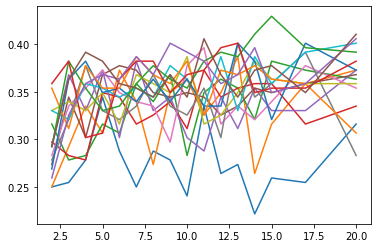

In [8]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]

for hidden_dim in dim_vals:
    data = correct_by_dim[correct_by_dim['hidden_dimensions'] == hidden_dim]
    plt.plot('embedding_dimensions', 'accuracy', data = data)

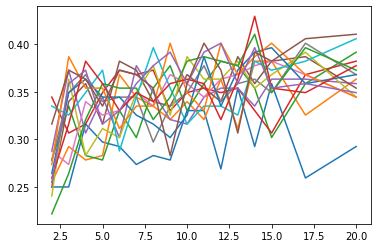

In [9]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]

for embedding_dim in dim_vals:
    data = correct_by_dim[correct_by_dim['embedding_dimensions'] == embedding_dim]
    plt.plot('hidden_dimensions', 'accuracy', data = data)

In [103]:
fine_acc_by_dim = dimension_groups['fine_accuracy'].max()
fine_acc_by_dim = fine_acc_by_dim.reset_index()
coarse_acc_by_dim = dimension_groups['coarse_accuracy'].max()
coarse_acc_by_dim = coarse_acc_by_dim.reset_index()
coarse_acc_by_dim.sort_values(by='coarse_accuracy', ascending=False).head(40)

,hidden_dimensions,embedding_dimensions,coarse_accuracy
256,60,60,0.838592
222,15,17,0.830097
124,9,14,0.822209
200,14,10,0.821602
27,3,13,0.820995
92,7,14,0.816748
195,14,5,0.816748
62,5,17,0.815534
163,12,5,0.814927
118,9,8,0.813714


In [11]:
accs_by_dim = dimension_groups[['fine_accuracy', 'coarse_accuracy']].max()
accs_by_dim

fine_accuracy  coarse_accuracy
hidden_dimensions embedding_dimensions                                
2                 2                            0.2440         0.424757
                  3                            0.2480         0.457524
                  4                            0.2620         0.433859
                  5                            0.2755         0.500000
                  6                            0.2820         0.496966
...                                               ...              ...
20                14                           0.4545         0.808859
                  15                           0.4550         0.790049
                  17                           0.4470         0.812500
                  20                           0.4685         0.792476
60                60                           0.4730         0.838592

[257 rows x 2 columns]

In [12]:
accs_by_dim2 = accs_by_dim.reset_index().sort_values(by=['embedding_dimensions', 'hidden_dimensions'])
accs_by_dim2.set_index(['embedding_dimensions', 'hidden_dimensions'])

fine_accuracy  coarse_accuracy
embedding_dimensions hidden_dimensions                                
2                    2                         0.2440         0.424757
                     3                         0.3230         0.598301
                     4                         0.3140         0.595874
                     5                         0.3695         0.712985
                     6                         0.3735         0.718447
...                                               ...              ...
20                   14                        0.4580         0.803398
                     15                        0.4405         0.779126
                     17                        0.4570         0.785194
                     20                        0.4685         0.792476
60                   60                        0.4730         0.838592

[257 rows x 2 columns]

In [13]:
accs_by_dim.sort_values(by=['fine_accuracy'], ascending=False)

fine_accuracy  coarse_accuracy
hidden_dimensions embedding_dimensions                                
60                60                           0.4730         0.838592
20                20                           0.4685         0.792476
14                15                           0.4680         0.794296
                  12                           0.4650         0.796117
15                7                            0.4640         0.799150
...                                               ...              ...
2                 8                            0.2605         0.486044
                  7                            0.2570         0.422330
                  10                           0.2550         0.464806
                  3                            0.2480         0.457524
                  2                            0.2440         0.424757

[257 rows x 2 columns]

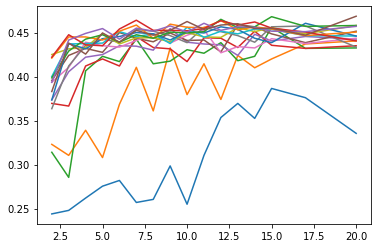

In [14]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]

for hidden_dim in dim_vals:
    data = fine_acc_by_dim[fine_acc_by_dim['hidden_dimensions'] == hidden_dim]
    plt.plot('embedding_dimensions', 'fine_accuracy', data=data, label=str(hidden_dim))

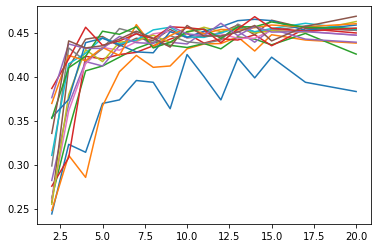

In [15]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]

for embedding_dim in dim_vals:
    data = fine_acc_by_dim[fine_acc_by_dim['embedding_dimensions'] == embedding_dim]
    plt.plot('hidden_dimensions', 'fine_accuracy', data = data,label=str(embedding_dim))

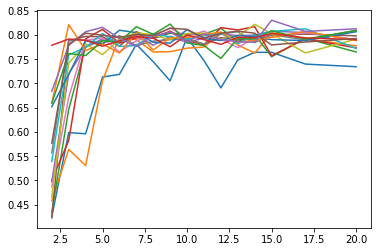

In [16]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]

for embedding_dim in dim_vals:
    data = coarse_acc_by_dim[fine_acc_by_dim['embedding_dimensions'] == embedding_dim]
    plt.plot('hidden_dimensions', 'coarse_accuracy', data = data,label=str(embedding_dim))

<ipython-input-17-7df0b37da52c>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


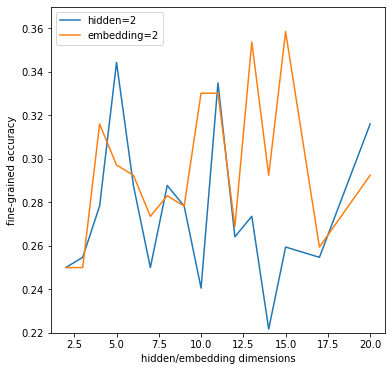

In [17]:
fig = plt.figure(figsize=(6,6))
dim = 2

ax = fig.add_subplot(1,1,1)
hidden_data = correct_by_dim[correct_by_dim['hidden_dimensions'] == dim]
embedding_data = correct_by_dim[correct_by_dim['embedding_dimensions'] == dim]
ax.plot('embedding_dimensions', 'accuracy', data=hidden_data, label='hidden=' + str(dim))
ax.plot('hidden_dimensions', 'accuracy', data=embedding_data, label='embedding=' + str(dim))
ax.set_ylim(0.22, 0.37)
ax.set_xlabel('hidden/embedding dimensions')
ax.set_ylabel('fine-grained accuracy')
ax.legend()
fig.show()

<ipython-input-18-03f8103b3051>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


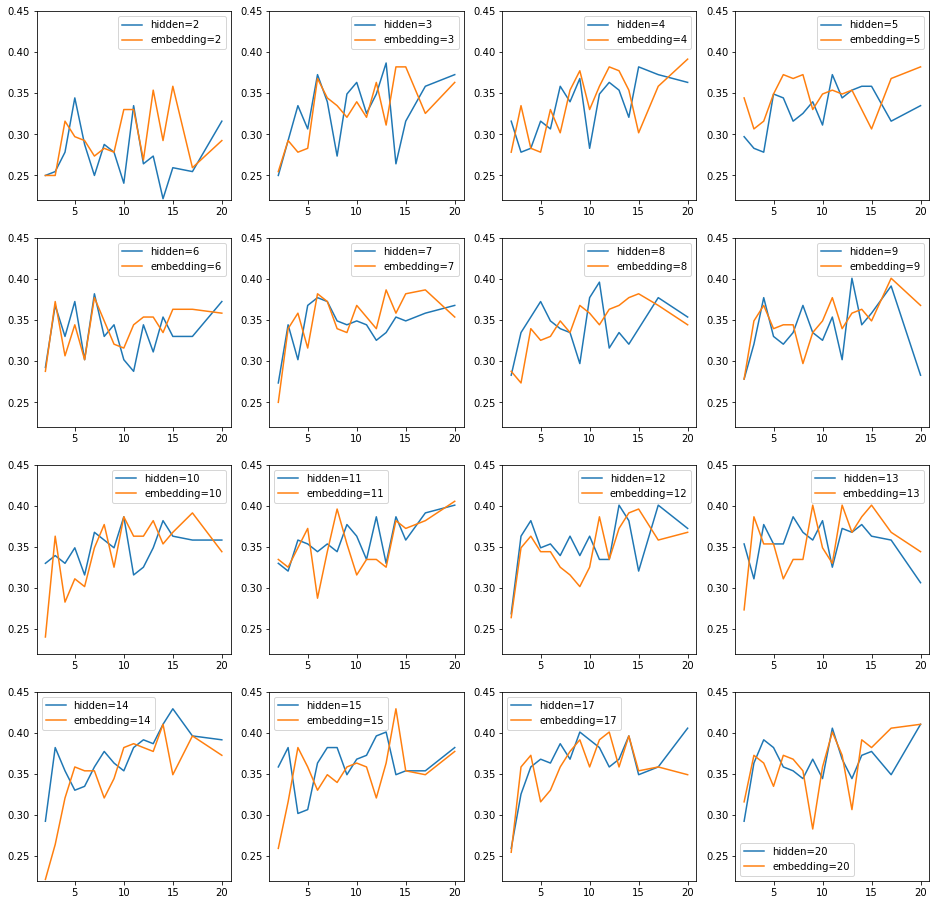

In [18]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]
fig = plt.figure(figsize=(16,16))

for index,dim in enumerate(dim_vals):
    ax = fig.add_subplot(4,4,index+1)
    hidden_data = correct_by_dim[correct_by_dim['hidden_dimensions'] == dim]
    embedding_data = correct_by_dim[correct_by_dim['embedding_dimensions'] == dim]
    ax.plot('embedding_dimensions', 'accuracy', data=hidden_data, label='hidden=' + str(dim))
    ax.plot('hidden_dimensions', 'accuracy', data=embedding_data, label='embedding=' + str(dim))
    ax.set_ylim(0.22,0.45)
    ax.legend()
    
fig.show()

<ipython-input-19-bf38c511b023>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


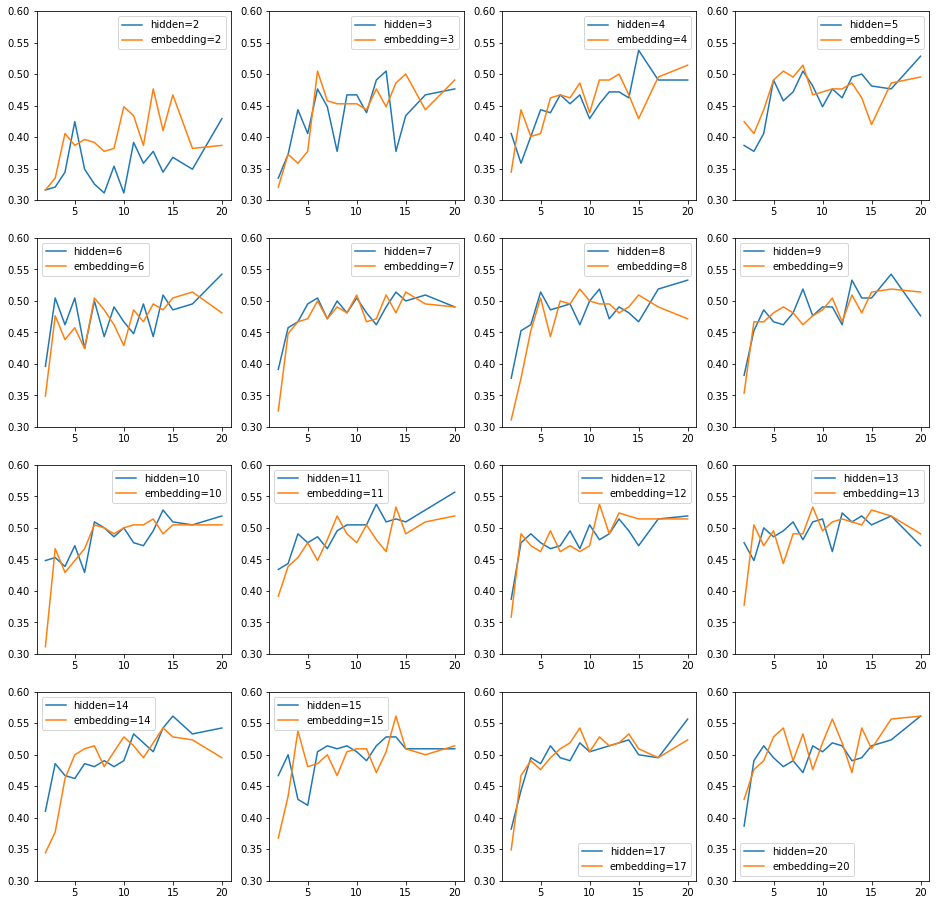

In [19]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]
fig = plt.figure(figsize=(16,16))

for index,dim in enumerate(dim_vals):
    ax = fig.add_subplot(4,4,index+1)
    hidden_data = correct_coarse_by_dim[correct_coarse_by_dim['hidden_dimensions'] == dim]
    embedding_data = correct_coarse_by_dim[correct_coarse_by_dim['embedding_dimensions'] == dim]
    ax.plot('embedding_dimensions', 'accuracy', data=hidden_data, label='hidden=' + str(dim))
    ax.plot('hidden_dimensions', 'accuracy', data=embedding_data, label='embedding=' + str(dim))
    ax.set_ylim(0.3,0.6)
    ax.legend()
    
fig.show()

<ipython-input-20-1418dd3a6cd9>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


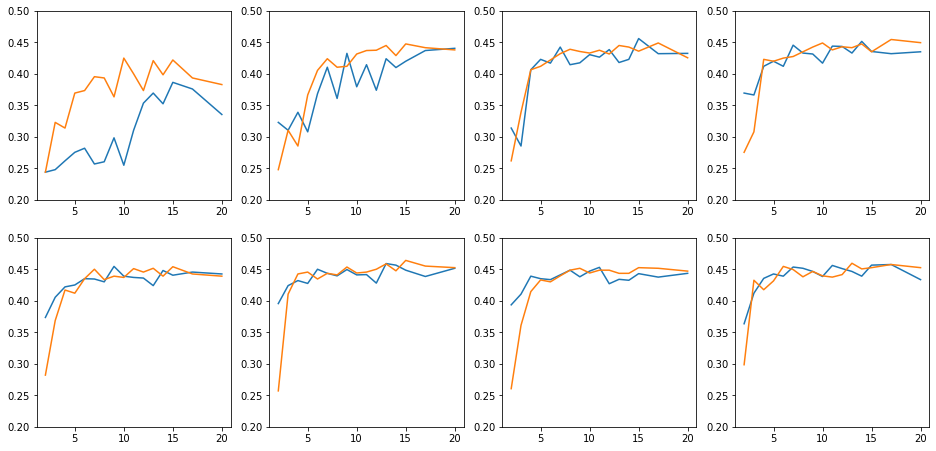

In [20]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=(16,16))

for index, dim in enumerate(dim_vals):
    ax = fig.add_subplot(4,4,index+1)
    hidden_data = fine_acc_by_dim[fine_acc_by_dim['hidden_dimensions'] == dim]
    embedding_data = fine_acc_by_dim[fine_acc_by_dim['embedding_dimensions'] == dim]
    ax.plot('embedding_dimensions', 'fine_accuracy', data=hidden_data, label='hidden constant')
    ax.plot('hidden_dimensions', 'fine_accuracy', data=embedding_data, label='embedding constant')
    ax.set_ylim(0.2, 0.5)

fig.show()

<ipython-input-21-59a5f6462e23>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


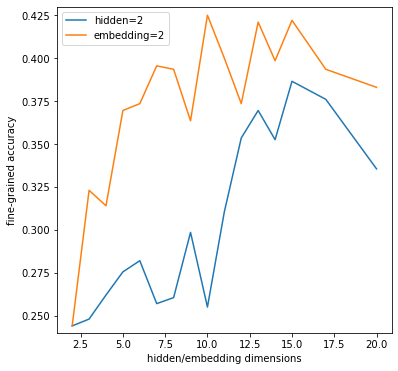

In [21]:
fig = plt.figure(figsize=(6,6))
dim = 2

ax = fig.add_subplot(1,1,1)
hidden_data = fine_acc_by_dim[fine_acc_by_dim['hidden_dimensions'] == dim]
embedding_data = fine_acc_by_dim[fine_acc_by_dim['embedding_dimensions'] == dim]
ax.plot('embedding_dimensions', 'fine_accuracy', data=hidden_data, label='hidden=' + str(dim))
ax.plot('hidden_dimensions', 'fine_accuracy', data=embedding_data, label='embedding=' + str(dim))
ax.set_ylim(0.24, 0.43)
ax.set_xlabel('hidden/embedding dimensions')
ax.set_ylabel('fine-grained accuracy')
ax.legend()
fig.show()

In [22]:
lrp_by_sentence = lrp_output.set_index('sentence').sort_values(by='sentence')
# get number of times sentence was incorrect for hidden = 2
num_incorrect = lrp_by_sentence[(lrp_by_sentence['hidden_dimensions']==2) & (lrp_by_sentence['embedding_dimensions']!=2) & ~lrp_by_sentence['correct']].groupby(lambda x: str(x))[['hidden_dimensions']].count()
all_incorrect = num_incorrect[num_incorrect['hidden_dimensions'] == 15].index.values # ones that were wrong every time
embcorrect_hidwrong = lrp_by_sentence[lrp_by_sentence.index.isin(all_incorrect) & (lrp_by_sentence['embedding_dimensions']==2) & (lrp_by_sentence['hidden_dimensions']!=2) & lrp_by_sentence['correct']].groupby(lambda x: str(x))[['hidden_dimensions']].count()

first_bad = embcorrect_hidwrong.sort_values(by='hidden_dimensions', ascending = False).index.values[0]
hiddens = lrp_by_sentence[lrp_by_sentence['hidden_dimensions'] == 2].loc[first_bad].sort_values(by='embedding_dimensions')
embeddings = lrp_by_sentence[lrp_by_sentence['embedding_dimensions'] == 2].loc[first_bad].sort_values(by='hidden_dimensions')


num_incorrect = lrp_by_sentence[(lrp_by_sentence['embedding_dimensions']==2) & (lrp_by_sentence['hidden_dimensions']!=2) & ~lrp_by_sentence['correct']].groupby(lambda x: str(x))[['hidden_dimensions']].count()
all_incorrect = num_incorrect[num_incorrect['hidden_dimensions'] == 15].index.values # ones that were wrong every time
hidcorrect_embwrong = lrp_by_sentence[lrp_by_sentence.index.isin(all_incorrect) & (lrp_by_sentence['hidden_dimensions']==2) & (lrp_by_sentence['embedding_dimensions']!=2) & lrp_by_sentence['correct']].groupby(lambda x: str(x))[['hidden_dimensions']].count()

first_bad = hidcorrect_embwrong.sort_values(by='hidden_dimensions', ascending = False).index.values[0]
hiddens_2 = lrp_by_sentence[lrp_by_sentence['hidden_dimensions'] == 2].loc[first_bad].sort_values(by='embedding_dimensions')
embeddings_2 = lrp_by_sentence[lrp_by_sentence['embedding_dimensions'] == 2].loc[first_bad].sort_values(by='hidden_dimensions')


In [23]:
hiddens.head(1)

,hidden_dimensions,embedding_dimensions,fine_accuracy,coarse_accuracy,true_class,predicted_class,class_scores,word_relevances,heatmap_html,correct,correct_coarse
sentence,,,,,,,,,,,
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,2,0.244,0.424757,2,3,"[-0.6776790097119741, 0.5202521433224184, -0.1...","[0.12525213401447305, 0.18542867710538835, -0....","<span style=""background-color:#ffcaca"">faultle...",False,False


In [24]:
for index, row in hiddens.iterrows():
    print(row['word_relevances'])
    
print('break')
for index, row in embeddings.iterrows():
    display(HTML(row['heatmap_html']))
hiddens

[0.12525213401447305, 0.18542867710538835, -0.5947383728737707, -0.4248717943520236, -0.22752511384241014, -0.19058616635988962]
[-0.1494654108969834, 0.061537748461998984, -0.9495685836161449, -0.8827842586228591, -0.5148763394543703, -0.4704442294213402]
[-0.0035865150504771, -0.0020949393502279422, 0.00589773892724941, -0.003709874577006551, -0.01098901902019053, -0.0008518033311851513]
[-0.08792430805784246, 0.0694306231738484, -0.40893489924284754, -1.0123519621453276, -0.5606016597522604, -0.2659044037265305]
[-0.18196167976237526, -0.2216666903372295, 0.09178154824458945, -0.2508732249406472, -0.2039907050019992, -0.19805365981788586]
[-0.029103203850710285, 0.031427010776651165, -0.03803817278058664, -0.044897339726633595, -0.075597871310071, -0.012084041509466445]
[-0.0049762792509096525, 0.028456159728896778, -0.021480819129926283, -0.05410191074882628, -0.025171496922968908, 0.031524070115109534]
[0.07198983470412934, 0.046370142100452594, 0.00637235609376139, -0.08702068749

,hidden_dimensions,embedding_dimensions,fine_accuracy,coarse_accuracy,true_class,predicted_class,class_scores,word_relevances,heatmap_html,correct,correct_coarse
sentence,,,,,,,,,,,
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,2,0.2440,0.424757,2,3,"[-0.6776790097119741, 0.5202521433224184, -0.1...","[0.12525213401447305, 0.18542867710538835, -0....","<span style=""background-color:#ffcaca"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,3,0.2480,0.457524,2,3,"[-1.09958425573996, 0.23111951589395263, 0.227...","[-0.1494654108969834, 0.061537748461998984, -0...","<span style=""background-color:#d6d6ff"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,4,0.2620,0.433859,2,1,"[-0.15682819441762233, 0.16869877606406156, -0...","[-0.0035865150504771, -0.0020949393502279422, ...","<span style=""background-color:#acacff"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,5,0.2755,0.500000,2,3,"[-1.0518973146577604, 0.4102821497100019, -0.3...","[-0.08792430805784246, 0.0694306231738484, -0....","<span style=""background-color:#e8e8ff"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,6,0.2820,0.496966,2,3,"[-1.1355334040958442, 0.44745786704431517, -0....","[-0.18196167976237526, -0.2216666903372295, 0....","<span style=""background-color:#4646ff"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,7,0.2570,0.422330,2,1,"[-0.039033178499287, 0.2578956355060952, -0.06...","[-0.029103203850710285, 0.031427010776651165, ...","<span style=""background-color:#9c9cff"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,8,0.2605,0.486044,2,3,"[-0.2594290424644374, 0.2902685284420506, -0.1...","[-0.0049762792509096525, 0.028456159728896778,...","<span style=""background-color:#e8e8ff"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,9,0.2985,0.556432,2,3,"[-1.113050615109072, 0.5603611519233612, -0.36...","[0.07198983470412934, 0.046370142100452594, 0....","<span style=""background-color:#ff2c2c"">faultle...",False,False
"['faultlessly', 'professional', 'but', 'finally', 'slight', '.']",2,10,0.2550,0.464806,2,3,"[-0.9528747976423415, 0.27703129408879734, -0....","[-0.06397671318410081, -0.04575858898633577, -...","<span style=""background-color:#e8e8ff"">faultle...",False,False


In [25]:
classes = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
border_style = 'border:1px solid black;border-collapse: collapse;'
table_style = f'{border_style};display:inline-block;padding:5px;'
the_html = 'Hidden Dimension = 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Embedding Dimension = 2<br>'
the_html += f'<table style="{table_style}"><tr><th style="{border_style}">Embedding Dimensions</th><th style="{border_style}">Predicted</th><th style="{border_style};text-align:left;">Heatmap</th></tr>'
for row in hiddens.head(5).iterrows():
    the_html += '<tr>'
    the_html += f"<td style=\"{border_style};text-align:center;\">{row[1]['embedding_dimensions']}</td><td style=\"{border_style}\">{classes[row[1]['predicted_class']]}</td><td style=\"{border_style}\">{row[1]['heatmap_html']}</td>"
    the_html += '</tr>'
the_html += '</table>'

the_html += f'<table style="{table_style}"><tr><th style="{border_style}">Hidden Dimensions</th><th style="{border_style}">Predicted</th><th style="{border_style};text-align:left;">Heatmap</th></tr>'
for row in embeddings.head(5).iterrows():
    the_html += '<tr>'
    the_html += f"<td style=\"{border_style};text-align:center;\">{row[1]['hidden_dimensions']}</td><td style=\"{border_style}\">{classes[row[1]['predicted_class']]}</td><td style=\"{border_style}\">{row[1]['heatmap_html']}</td>"
    the_html += '</tr>'
the_html += '</table>'
#print(the_html)
display(HTML(the_html))

Embedding Dimensions,Predicted,Heatmap
2,positive,faultlessly professional but finally slight .
3,positive,faultlessly professional but finally slight .
4,negative,faultlessly professional but finally slight .
5,positive,faultlessly professional but finally slight .
6,positive,faultlessly professional but finally slight .
Hidden Dimensions,Predicted,Heatmap
2,positive,faultlessly professional but finally slight .
3,neutral,faultlessly professional but finally slight .
4,neutral,faultlessly professional but finally slight .
5,neutral,faultlessly professional but finally slight .


In [26]:
classes = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
border_style = 'border:1px solid black;border-collapse: collapse;'
table_style = f'{border_style};display:inline-block;padding:5px;'
the_html = 'Hidden Dimension = 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Embedding Dimension = 2<br>'
the_html += f'<table style="{table_style}"><tr><th style="{border_style}">Embedding Dimensions</th><th style="{border_style}">Predicted</th><th style="{border_style};text-align:left;">Heatmap</th></tr>'
for row in hiddens_2.head(5).iterrows():
    the_html += '<tr>'
    the_html += f"<td style=\"{border_style};text-align:center;\">{row[1]['embedding_dimensions']}</td><td style=\"{border_style}\">{classes[row[1]['predicted_class']]}</td><td style=\"{border_style}\">{row[1]['heatmap_html']}</td>"
    the_html += '</tr>'
the_html += '</table>'

the_html += f'<table style="{table_style}"><tr><th style="{border_style}">Hidden Dimensions</th><th style="{border_style}">Predicted</th><th style="{border_style};text-align:left;">Heatmap</th></tr>'
for row in embeddings_2.head(5).iterrows():
    the_html += '<tr>'
    the_html += f"<td style=\"{border_style};text-align:center;\">{row[1]['hidden_dimensions']}</td><td style=\"{border_style}\">{classes[row[1]['predicted_class']]}</td><td style=\"{border_style}\">{row[1]['heatmap_html']}</td>"
    the_html += '</tr>'
the_html += '</table>'
print(the_html)
#display(HTML(the_html))

Hidden Dimension = 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Embedding Dimension = 2<br><table style="border:1px solid black;border-collapse: collapse;;display:inline-block;padding:5px;"><tr><th style="border:1px solid black;border-collapse: collapse;">Embedding Dimensions</th><th style="border:1px solid black;border-collapse: collapse;">Predicted</th><th style="border:1px solid black;border-collapse: collapse;;text-align:left;">Heatmap</th></tr><tr><td style="border:1px solid black;borde

In [27]:
classes = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
the_html = '<table><tr><th>Predicted</th><th>Heatmap</th></tr>'
for row in embeddings.head(5).iterrows():
    the_html += '<tr>'
    the_html += f"<td>{classes[row[1]['predicted_class']]}</td><td>{row[1]['heatmap_html']}</td>"
    the_html += '</tr>'
the_html += '</table>'
display(HTML(the_html))

Predicted,Heatmap
positive,faultlessly professional but finally slight .
neutral,faultlessly professional but finally slight .
neutral,faultlessly professional but finally slight .
neutral,faultlessly professional but finally slight .
neutral,faultlessly professional but finally slight .


<ipython-input-28-374e27ed2f3e>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


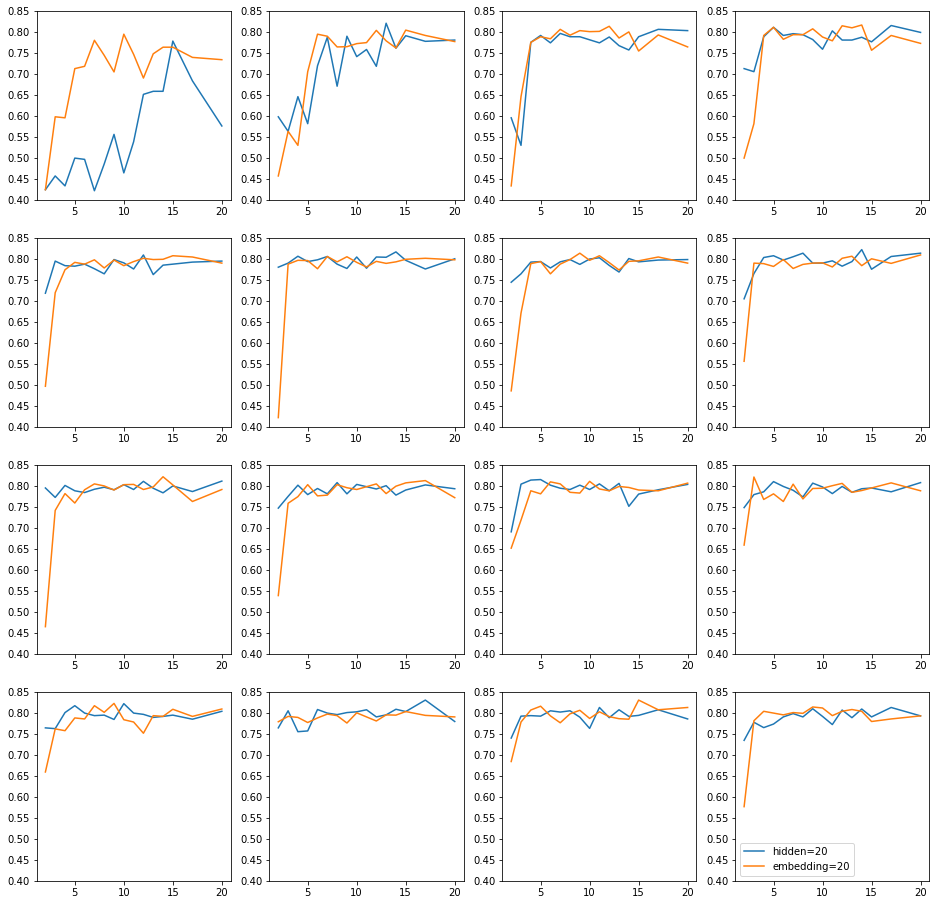

In [28]:
dim_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]
fig = plt.figure(figsize=(16,16))

for index, dim in enumerate(dim_vals):
    ax = fig.add_subplot(4,4,index+1)
    hidden_data = coarse_acc_by_dim[coarse_acc_by_dim['hidden_dimensions'] == dim]
    embedding_data = coarse_acc_by_dim[coarse_acc_by_dim['embedding_dimensions'] == dim]
    ax.plot('embedding_dimensions', 'coarse_accuracy', data=hidden_data, label='hidden=' + str(dim))
    ax.plot('hidden_dimensions', 'coarse_accuracy', data=embedding_data, label='embedding=' + str(dim))
    ax.set_ylim(0.4, 0.85)
plt.legend()
fig.show()

<ipython-input-29-d37855d70c9e>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


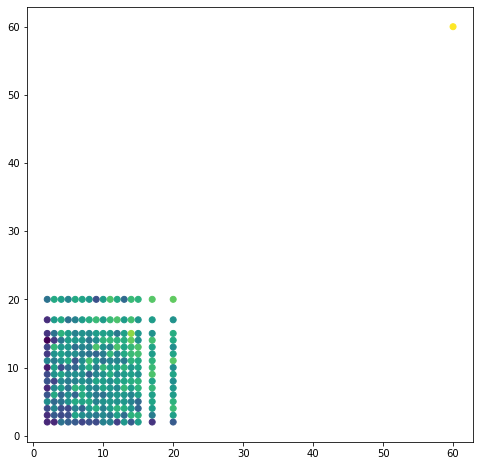

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter('hidden_dimensions', 'embedding_dimensions', c=correct_by_dim['accuracy'], data=correct_by_dim)
fig.show()

In [30]:
def printHtml(hidden_dim, embedding_dim):
    group = dimension_groups.get_group((hidden_dim,embedding_dim))
    print('correct:\n')
    for index, row in group[group['correct_coarse'] & (group['true_class'] != 2)].head(5).iterrows():
        print('true class: ' + str(row['true_class']))
        print('predicted class: ' + str(row['predicted_class']))
        display(HTML(row['heatmap_html']))

    print('\nincorrect:\n')
    for index, row in group[~group['correct_coarse'] & (group['true_class'] != 2)].head(5).iterrows():
        print('true class: ' + str(row['true_class']))
        print('predicted class: ' + str(row['predicted_class']))
        display(HTML(row['heatmap_html']))

In [31]:
printHtml(2,2)

correct:

true class: 3
predicted class: 3


true class: 3
predicted class: 3


true class: 3
predicted class: 3


true class: 3
predicted class: 3


true class: 3
predicted class: 3



incorrect:

true class: 1
predicted class: 2


true class: 1
predicted class: 2


true class: 3
predicted class: 2


true class: 3
predicted class: 2


true class: 1
predicted class: 3


In [32]:
printHtml(60,60)

correct:

true class: 3
predicted class: 3


true class: 3
predicted class: 3


true class: 3
predicted class: 3


true class: 1
predicted class: 0


true class: 3
predicted class: 3



incorrect:

true class: 1
predicted class: 2


true class: 1
predicted class: 3


true class: 1
predicted class: 3


true class: 1
predicted class: 3


true class: 1
predicted class: 3


In [33]:
from lrp_single import getLRPForArray

In [34]:
def printLRPSingle(words, hidden_dim, embedding_dim, target_class = None):
    classes = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
    model_path = f'/home/rlashof/repos/Visualizing-and-Understanding-Neural-Models-in-NLP/sentiment_bidi/model_dim{hidden_dim}_emb{embedding_dim}-00'
    lrp_data = getLRPForArray(words, model_path, target_class)
    print(f'predicted class: {classes[lrp_data["predicted_class"]]}')
    print(f'class scores: {lrp_data["scores"]}')
    print(f'Relevance scores: {lrp_data["relevances"]}')
    display(HTML(lrp_data['html_heatmap']))

In [35]:
hidden_dim = 60
embedding_dim = 60
words = ['though']
printLRPSingle(words, hidden_dim, embedding_dim)

predicted class: neutral
class scores: [-6.717725666954902, -2.424763081893607, 6.8317386214621365, -1.6999578488806857, -6.9014060369337695]
Relevance scores: [5.008336518941721]


In [36]:
hidden_dim = 60
embedding_dim = 60
words = ['but']
printLRPSingle(words, hidden_dim, embedding_dim)

predicted class: neutral
class scores: [-6.394043074094127, -2.316223770246553, 6.998379994104345, -1.8441553912147184, -7.002964333471432]
Relevance scores: [4.755464926057705]


In [37]:
hidden_dim = 5
embedding_dim = 2
words = ['not']
printLRPSingle(words, hidden_dim, embedding_dim)

predicted class: negative
class scores: [-1.4555932775807263, 0.8868222487574886, 0.5657157083427597, 0.02024625082006315, -2.903233648684066]
Relevance scores: [0.9770622029730267]


In [38]:
hidden_dim = 2
embedding_dim = 2
words = ['not','good']
printLRPSingle(words, hidden_dim, embedding_dim)

predicted class: negative
class scores: [0.42224381634119257, 0.7996504257005788, -0.8511479388120102, 0.7924929609742097, 0.7564030299235989]
Relevance scores: [0.5221268173184362, 0.8736580350510363]


In [39]:
hidden_dim = 2
embedding_dim = 10
words = ['not','bad']
printLRPSingle(words, hidden_dim, embedding_dim)

predicted class: very positive
class scores: [1.579346110798629, 0.7275005195235837, -1.3278810210668608, 0.7179796586621187, 2.0632916551506035]
Relevance scores: [-0.35846279388838026, 4.449853750605475]


In [45]:
dims = [2, 20]
words = ['not', 'bad']
for dim in dims:
    for dim2 in dims:
        print(f'hidden:{dim}, embedding:{dim2}')
        printLRPSingle(words, dim, dim2, 2)
        
dim=60
dim2=60
print(f'hidden:{dim}, embedding:{dim2}')
printLRPSingle(words, dim, dim2, 2)

hidden:2, embedding:2
predicted class: very positive
class scores: [1.4036406493846947, 1.1212551085847846, -1.556355343479979, 0.9762332422633724, 1.7363752759825997]
Relevance scores: [-0.665253654996441, -1.6802732345584612]


hidden:2, embedding:20
predicted class: very negative
class scores: [2.5188837843627754, 1.246356682524922, -1.453750296098861, 0.014680786322469712, 2.3552538586434086]
Relevance scores: [-0.5571768646048467, -2.642935601631426]


hidden:20, embedding:2
predicted class: negative
class scores: [0.5775986038814324, 1.4937359991045491, 0.34151816351681913, -0.7907665397948895, -3.159276647084349]
Relevance scores: [-0.10178928338000033, -0.40801517139350696]


hidden:20, embedding:20
predicted class: neutral
class scores: [-0.7598121898151091, 0.5901241640095136, 1.7750752214619139, -1.5797829585901095, -5.188467424379724]
Relevance scores: [1.6008352409173325, -1.6491146613097118]


hidden:60, embedding:60
predicted class: neutral
class scores: [-0.9620885299473989, -0.3813823687402178, 1.394447553065601, -0.15812663225208812, -2.940279743394492]
Relevance scores: [1.006077752057764, -0.7439401597886348]


In [41]:
dims = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]
words = ['not', 'good']
for dim in dims:
    print('----------------------------')
    print(f'hidden:{2}, embedding:{dim}')
    printLRPSingle(words, 2, dim)
    print('----------------------------')

for dim in dims:
    print('----------------------------')
    print(f'hidden:{dim}, embedding:{2}')
    printLRPSingle(words, dim, 2)
    print('----------------------------')

----------------------------
hidden:2, embedding:2
predicted class: negative
class scores: [0.42224381634119257, 0.7996504257005788, -0.8511479388120102, 0.7924929609742097, 0.7564030299235989]
Relevance scores: [0.5221268173184362, 0.8736580350510363]


----------------------------
----------------------------
hidden:2, embedding:3
predicted class: negative
class scores: [0.13512180346139946, 0.9689919074765065, -0.9346731828176247, 0.9681105499690859, 0.39278265832470316]
Relevance scores: [0.5213874382894802, 1.3831126367868087]


----------------------------
----------------------------
hidden:2, embedding:4
predicted class: very negative
class scores: [0.9495060593912692, 0.23966588847724793, -0.5429579915155789, 0.13933630245835005, 0.8951714384106283]
Relevance scores: [0.4118903087753531, 0.5750339479150871]


----------------------------
----------------------------
hidden:2, embedding:5
predicted class: positive
class scores: [-0.22063105352136292, 0.6557867142761229, -0.7727983820855747, 0.8099581680665213, 0.12683691646069062]
Relevance scores: [0.36182680620051183, 0.7467903647940878]


----------------------------
----------------------------
hidden:2, embedding:6
predicted class: positive
class scores: [-0.999532822227489, 0.4402406280664427, -0.2097090017947551, 0.537592325579124, -0.5619212408799757]
Relevance scores: [0.3602167369132402, 0.7447571864590905]


----------------------------
----------------------------
hidden:2, embedding:7
predicted class: very negative
class scores: [1.072736993009543, 0.4262511702437498, -0.5911667907703922, 0.3040726832553129, 1.0316166086518044]
Relevance scores: [0.3875526488638107, 0.508978686693232]


----------------------------
----------------------------
hidden:2, embedding:8
predicted class: very positive
class scores: [1.102529457913651, 0.43489638435550243, -0.7755079136816152, 0.3406639035766899, 1.106564356339916]
Relevance scores: [0.5367386896941619, 0.7010649127935391]


----------------------------
----------------------------
hidden:2, embedding:9
predicted class: positive
class scores: [-1.2546611807069463, -0.120423078337243, 0.06605529726629922, 0.5827185298753426, -0.6343605203473103]
Relevance scores: [0.2913103645430707, 1.12617808692768]


----------------------------
----------------------------
hidden:2, embedding:10
predicted class: positive
class scores: [-0.3101057447116802, 0.8551959309303516, -1.058371528216512, 1.2903415351022536, 0.2683025024168242]
Relevance scores: [0.2729090248521417, 1.0536973982202311]


----------------------------
----------------------------
hidden:2, embedding:11
predicted class: positive
class scores: [-1.2647333581355542, 0.5523963639303389, -0.33545868173116145, 0.9152536046752711, -0.6742437683914525]
Relevance scores: [0.5674074109483112, 0.7702469196755659]


----------------------------
----------------------------
hidden:2, embedding:12
predicted class: very positive
class scores: [0.5955122117215949, 0.7776828437601075, -0.9141953846854673, 0.7033772281254418, 0.846174689780424]
Relevance scores: [-0.8124948640617035, 2.7286421951526982]


----------------------------
----------------------------
hidden:2, embedding:13
predicted class: positive
class scores: [-1.5854849889815594, -0.169288981455303, -0.6831914935971201, 2.019548249484833, -0.09424600162671792]
Relevance scores: [-0.13223230672574973, 2.014391503046256]


----------------------------
----------------------------
hidden:2, embedding:14
predicted class: positive
class scores: [-0.6693933872760265, 0.9810224532267607, -1.065455378908788, 1.6805759278615215, -0.1985928859546633]
Relevance scores: [-2.5142424113710318, 3.5685809545528278]


----------------------------
----------------------------
hidden:2, embedding:15
predicted class: positive
class scores: [-1.5411531235397022, 0.21529558296238993, 0.04075268505515317, 0.7706507181242299, -1.3220544525444369]
Relevance scores: [-1.4091382956724081, 2.0748579599888144]


----------------------------
----------------------------
hidden:2, embedding:17
predicted class: positive
class scores: [-1.804237932400261, 0.30197416902712515, 0.18561873981034782, 0.7931080649098077, -1.5924719216194458]
Relevance scores: [-0.9493761190400233, 1.5095294116061604]


----------------------------
----------------------------
hidden:2, embedding:20
predicted class: positive
class scores: [-1.4004755283769992, -0.26314620295298197, -0.23417504639747477, 1.27658849243815, -0.262052342394296]
Relevance scores: [-0.4375382678396502, 1.9178541545357637]


----------------------------
----------------------------
hidden:2, embedding:2
predicted class: negative
class scores: [0.42224381634119257, 0.7996504257005788, -0.8511479388120102, 0.7924929609742097, 0.7564030299235989]
Relevance scores: [0.5221268173184362, 0.8736580350510363]


----------------------------
----------------------------
hidden:3, embedding:2
predicted class: positive
class scores: [-0.32605856517412746, 1.2651045904645835, -1.9674471906544342, 2.958811370444409, 1.0752659436129628]
Relevance scores: [0.5875884251314167, 2.729249054479385]


----------------------------
----------------------------
hidden:4, embedding:2
predicted class: positive
class scores: [-0.926615827257611, 0.5719721926699225, -0.5401875323758244, 1.4048845862440473, -0.39172792352979624]
Relevance scores: [0.34821296579446315, 2.4636059678153295]


----------------------------
----------------------------
hidden:5, embedding:2
predicted class: positive
class scores: [-0.7494442808480466, 0.3184485342161738, -0.7957976443056809, 2.018253447092615, 0.8276615121739828]
Relevance scores: [0.14955160174882154, 4.387896281280904]


----------------------------
----------------------------
hidden:6, embedding:2
predicted class: positive
class scores: [-1.1602186832510268, -0.3992127493362392, -0.11209435826386877, 1.8970660018745789, 0.8851707647643383]
Relevance scores: [8.681299692947508e-05, 3.208202693168424]


----------------------------
----------------------------
hidden:7, embedding:2
predicted class: positive
class scores: [-2.5753413501687734, -0.5474700570050777, 0.4272557445977741, 1.5921621081426995, 0.49381861135208016]
Relevance scores: [-0.29796327635925746, 3.244687917568482]


----------------------------
----------------------------
hidden:8, embedding:2
predicted class: positive
class scores: [-2.5107244045671453, -0.577665216928787, 0.5743977004161295, 1.632041704504966, 0.009890464420315492]
Relevance scores: [-0.43740895668518665, 3.7413592979408437]


----------------------------
----------------------------
hidden:9, embedding:2
predicted class: positive
class scores: [-1.271977226763486, -0.33639183181423093, -0.3617466412566367, 2.258003668201855, 0.9302053863141969]
Relevance scores: [0.19026427315417216, 2.784238010353796]


----------------------------
----------------------------
hidden:10, embedding:2
predicted class: positive
class scores: [-2.2810053428185855, -0.4560874156776379, 0.30832913012469776, 1.6539575357736018, -0.29662868513995233]
Relevance scores: [-0.45655125969795446, 3.300975786417345]


----------------------------
----------------------------
hidden:11, embedding:2
predicted class: positive
class scores: [-3.010029629994793, -0.6054931487107614, 0.6697694438425711, 1.4949670111294142, -0.2694415505863921]
Relevance scores: [-0.3645672992953991, 2.9370904065228243]


----------------------------
----------------------------
hidden:12, embedding:2
predicted class: positive
class scores: [-1.0579793692621855, -0.32714775463075507, -0.3746468159847376, 1.9439013529589175, 0.9525326406837664]
Relevance scores: [-0.0024046396721830723, 2.0045395130992736]


----------------------------
----------------------------
hidden:13, embedding:2
predicted class: positive
class scores: [-2.5489144644829684, -0.7945539782621254, 0.7046614368921361, 1.1477555795762933, -0.22377165180006964]
Relevance scores: [-1.3966384255798197, 2.8688706471695617]


----------------------------
----------------------------
hidden:14, embedding:2
predicted class: positive
class scores: [-2.404486278563254, -0.5738880415233023, 0.6542101625418415, 1.7730042114780726, 0.27932116224562265]
Relevance scores: [-0.19829374770498184, 3.1059323038244306]


----------------------------
----------------------------
hidden:15, embedding:2
predicted class: neutral
class scores: [-2.649474507047259, -0.652893627584369, 0.9970035442062694, 0.9335795181755187, -0.4979306105629323]
Relevance scores: [-0.8182931730934198, -0.28222710865476297]


----------------------------
----------------------------
hidden:17, embedding:2
predicted class: positive
class scores: [-3.5580979660717276, -0.7649567833187658, 1.1432963934962979, 1.548774286994605, -0.581619746217935]
Relevance scores: [0.055116313820568086, 4.478487579290083]


----------------------------
----------------------------
hidden:20, embedding:2
predicted class: positive
class scores: [-1.5801471027537186, -0.6626654347330252, -0.06851909331653194, 1.412429084944573, 0.23099951751513698]
Relevance scores: [0.055798072689249495, 2.457278153377143]


----------------------------


In [46]:
printLRPSingle(['not', 'good'], 60, 60)

predicted class: negative
class scores: [0.19339469339770993, 3.177879564717042, 1.049186847964288, -1.7091097745033954, -3.7799842551396017]
Relevance scores: [3.360678673632399, -0.5709644872279929]


0.07718659167994457
0.19198755094828357
0.8297794693450588
0.9442833378757078


<ipython-input-100-1d0770539d77>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


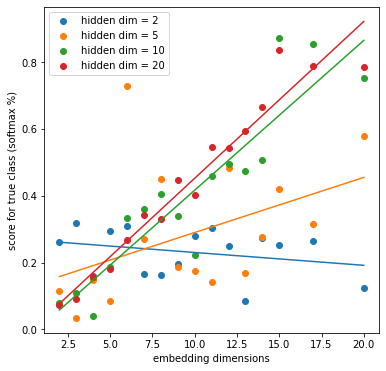

In [100]:
data = [[],[],[]]
dims2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]
dims = [2, 5, 10, 20]#[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]
words = ['not','good']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for dim in dims:
    data = [[],[],[]]
    for dim2 in dims2:
        model_path = f'/home/rlashof/repos/Visualizing-and-Understanding-Neural-Models-in-NLP/sentiment_bidi/model_dim{dim}_emb{dim2}-00'
        lrp_data = getLRPForArray(words, model_path)
        data[0].append(dim)
        data[1].append(dim2)
        data[2].append(exp(lrp_data['scores'][1])/(exp(lrp_data['scores'][0]) + exp(lrp_data['scores'][1]) + exp(lrp_data['scores'][2]) + exp(lrp_data['scores'][3]) + exp(lrp_data['scores'][4])))
    x = [[record] for record in data[1]]
    reg = LinearRegression().fit(x, data[2])
    print(reg.score(x, data[2]))
    ax.scatter(data[1], data[2], label=f'hidden dim = {dim}')
    plt.plot(np.unique(data[1]), np.poly1d(np.polyfit(data[1], data[2], 1))(np.unique(data[1])))
    ax.set_xlabel('embedding dimensions')
    ax.set_ylabel('score for true class (softmax %)')

ax.legend()        
fig.show()